# Assignment 3
### Due 9/23. Do four of five.

Hongfei Zhu nga3rp

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
df = pd.read_csv('00_intro/data/nhanes_data_17_18.csv')
df

/tmp/ipykernel_10827/1119971131.py:1: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('00_intro/data/nhanes_data_17_18.csv')


,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8361,102952.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.0,0.0,Never
8362,102953.0,Fair or,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,65.0,218.0,0.0,Never
8363,102954.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,66.0,150.0,0.0,Never
8364,102955.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
X = 'GeneralHealthCondition'
Y = 'TimesLost10LbsOrMoreToLoseWeight'

df['GHC_na'] = df[X].isna()
print(df['GHC_na'].value_counts())

df['WL_na'] = df[Y].isna()
print(df['WL_na'].value_counts())

GHC_na
False    5964
True     2402
Name: count, dtype: int64
WL_na
False    5794
True     2572
Name: count, dtype: int64


In [131]:
pd.crosstab(df[X], df[Y])

TimesLost10LbsOrMoreToLoseWeight,1 to 2,11 times or more,3 to 5,6 to 10,Never
GeneralHealthCondition,,,,,
Excellent,118,22,46,10,304
Fair or,307,56,179,71,509
Good,637,112,324,118,1063
Poor?,41,12,29,6,79
Very good,374,60,203,53,657


In [132]:
pd.crosstab(df[X], df[Y], normalize='columns')


TimesLost10LbsOrMoreToLoseWeight,1 to 2,11 times or more,3 to 5,6 to 10,Never
GeneralHealthCondition,,,,,
Excellent,0.079892,0.083969,0.058899,0.038760,0.116386
Fair or,0.207854,0.213740,0.229193,0.275194,0.194870
Good,0.431280,0.427481,0.414853,0.457364,0.406968
Poor?,0.027759,0.045802,0.037132,0.023256,0.030245
Very good,0.253216,0.229008,0.259923,0.205426,0.251531


Across all self-reported health categories, "Never" losing >= 10 lbs in the past is the most common response, but its share is highest for “Excellent” health and lower for “Fair/Poor”. Conversely, the probability of having lost ≥10 lbs 3–10+ times tends to be higher among those reporting worse health.

2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

In [133]:
X = 'GeneralHealthCondition'
Y = 'CurrentSelfreportedWeightPounds'

df['GHC_na'] = df[X].isna()
print(df['GHC_na'].value_counts())

df['WP_na'] = df[Y].isna()
print(df['WP_na'].value_counts())

GHC_na
False    5964
True     2402
Name: count, dtype: int64
WP_na
False    5828
True     2538
Name: count, dtype: int64


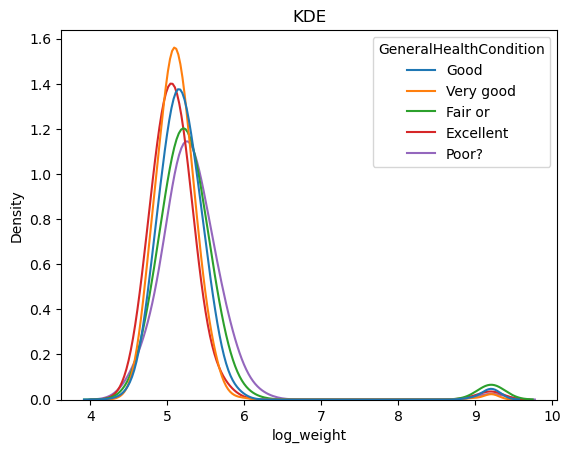

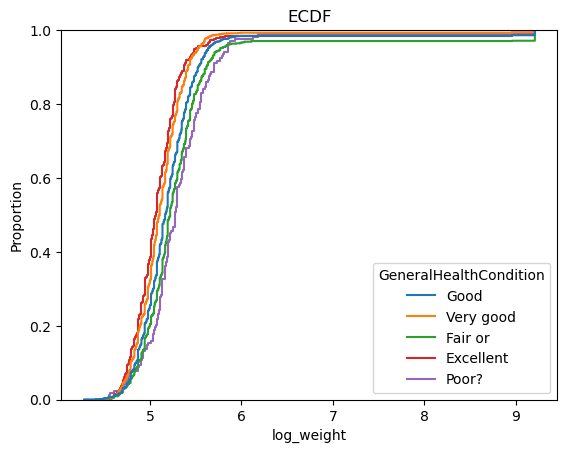

CurrentSelfreportedWeightPounds              \
                                                 count        mean   
GeneralHealthCondition                                               
Excellent                                        500.0  315.410000   
Fair or                                         1134.0  483.822751   
Good                                            2262.0  334.106101   
Poor?                                            169.0  321.798817   
Very good                                       1352.0  238.725592   

                                                                        
                                std   min    25%    50%    75%     max  
GeneralHealthCondition                                                  
Excellent               1204.831420  90.0  135.0  158.0  185.0  9999.0  
Fair or                 1664.206135  86.0  155.0  185.0  225.0  9999.0  
Good                    1202.150398  72.0  148.0  175.0  210.0  9999.0  
Poor?                   1064.212601  95.0  165.0  196.0  240.0  9999.0  
Very good                809.140090  85.0  140.0  165.0  192.0  9999.0

In [134]:
conditioner = X
df['log_weight'] = np.log(df[Y])

sns.kdeplot( data=df, x='log_weight', hue=conditioner, common_norm=False ).set(title='KDE')
plt.show()

sns.ecdfplot( data=df, x='log_weight', hue=conditioner).set(title='ECDF')
plt.show()

df.loc[:,[Y, conditioner]].groupby(conditioner).describe()

Those reporting “Excellent” health tend to weigh less on average. Those reporting “Fair or Poor” health show higher average weights and greater spread. The distributions of the KDE plot overlap heavily, but you can see a slight rightward shift (higher weights) for respondents with worse self-reported health. Also there are many unrealistic outliers that are messing with the KDE plot; for example 9999 lbs entries.

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

To predict Y at a target 
X=z, we choose a single number y^(z) that best fits the nearby data. "Best" means it makes the kernel-weighted squared errors as small as possible, where each observation gets a weight that decays with the distance between its xi and z. A basic fact from least squares is that when you minimize a (weighted) sum of squared deviations with respect to a single constant, the minimizer is the (weighted) mean. Therefore, the y^(z) that minimizes the kernel-weighted squared errors is simply the weighted average of the observed yi, with weights proportional to the kernel evaluated at the distances ​|xi - z| and then normalized to add to one. That is exactly the local-constant least-squares / Nadaraya–Watson estimator: take a smooth, distance-weighted average of nearby yi. The bandwidth controls how local the average is. Very small bandwidth uses only the closest points; very large bandwidth collapses toward the global mean. So, by the definition of the objective (kernel-weighted squared loss) and the property of least squares (means minimize squared error), the solution must be the kernel-weighted mean, aka the Nadaraya–Watson estimator.

In [135]:
# Cleaning data for analysis

height = df['CurrentSelfreportedHeightInches']
weight = df['CurrentSelfreportedWeightPounds']

clean = df[['CurrentSelfreportedHeightInches','CurrentSelfreportedWeightPounds']].dropna().rename(
    columns={'CurrentSelfreportedHeightInches':'height_in',
             'CurrentSelfreportedWeightPounds':'weight_lb'}
)

q_lo_h, q_hi_h = clean['height_in'].quantile([0.01, 0.99])
q_lo_w, q_hi_w = clean['weight_lb'].quantile([0.01, 0.99])

fence_mask = (
    clean['height_in'].between(q_lo_h, q_hi_h) &
    clean['weight_lb'].between(q_lo_w, q_hi_w)
)

abs_mask = (
    clean['height_in'].between(48, 84) &    # 4’0” to 7’0”
    clean['weight_lb'].between(70, 700)     # 70 lbs to 700 lbs
)

cleaned = clean[fence_mask & abs_mask].copy()

print("Original rows:", len(df))
print("Non-missing height & weight:", len(clean))
print("Rows after cleaning:", len(cleaned))

Original rows: 8366
Non-missing height & weight: 5776
Rows after cleaning: 5508


Computed bandwidth is: 0.6505800808996229


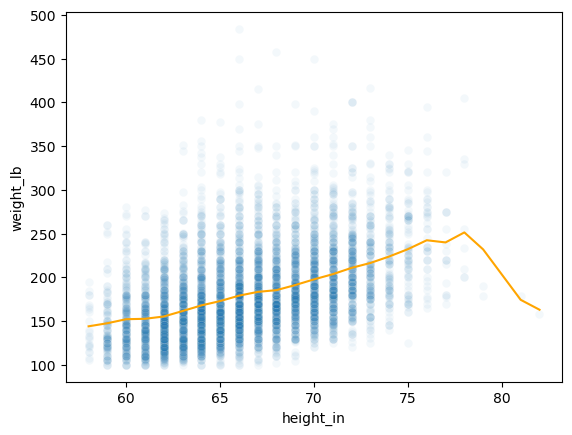

In [136]:
x = cleaned['height_in']
y = cleaned['weight_lb']

def lcls(x,y, h = None, plot=True):

    n = len(x)
    grid = np.sort(x.unique()) 

    if h is None:
        iqr = np.quantile(x,.75) - np.quantile(x,.25)
        h = 0.9 * min(np.std(x), iqr/1.34) * len(x) **(-0.2)
        print(f'Computed bandwidth is: {h}')

    I = -(x.to_numpy().reshape(-1,1)-grid.reshape(1,-1) )**2
    K = np.exp(I/(2*h**2) )/np.sqrt(2*np.pi*h**2 )

    numerator = y@K
    denominator = np.sum(K,axis=0)
    y_hat = numerator/denominator

    if plot:
        sns.scatterplot(data=cleaned, y=y, x=x,alpha=.05)
        sns.lineplot(x=grid,y=y_hat, color='orange')

    return y_hat, grid

y_hat, grid = lcls(x,y)

4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

In [137]:
class LCLSEstimator:

    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.bandwidth = self._silverman_bandwidth()

    def _silverman_bandwidth(self):

        n = len(self.X)
        iqr = np.subtract(*np.percentile(self.X, [75, 25]))
        std_dev = np.std(self.X)
        return 0.9 * np.minimum(std_dev, iqr / 1.34) * n**(-0.2)

    def _gaussian_kernel(self, z):
        return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * z**2)

    def predict(self, z):
        kernel_weights = self._gaussian_kernel((self.X - z) / self.bandwidth)
        return np.sum(kernel_weights * self.y) / (np.sum(kernel_weights) + 1e-8)

<Axes: xlabel='height_in', ylabel='weight_lb'>

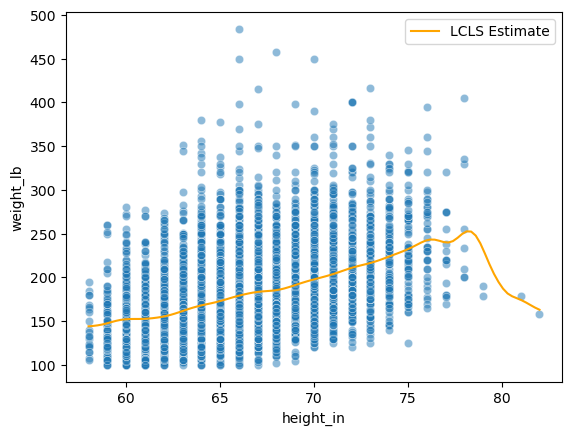

In [138]:
X = cleaned['height_in']
y = cleaned['weight_lb']

estimator = LCLSEstimator(X, y)
z = np.linspace(X.min(), X.max(), 100)
predictions = [estimator.predict(val) for val in z]

sns.scatterplot(x=X, y=y, alpha=0.5)
sns.lineplot(x=z, y=predictions, color='orange', label='LCLS Estimate')

5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome

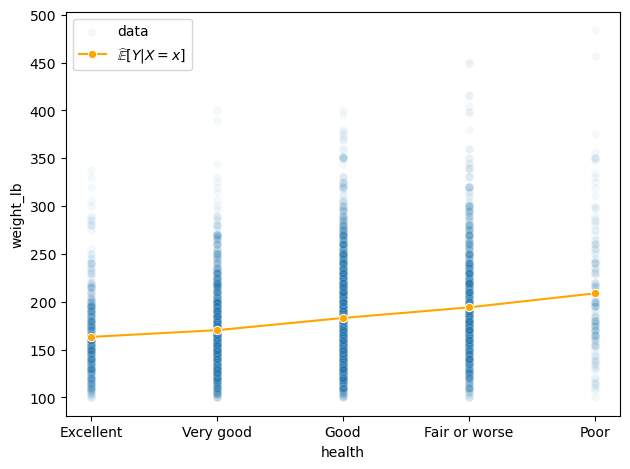

In [141]:
health_order = ['Excellent', 'Very good', 'Good', 'Fair or worse', 'Poor']

cleaned['health'] = (df.loc[cleaned.index, 'GeneralHealthCondition']
    .astype('string').str.strip()
    .str.replace(r'\?$', '', regex=True)
    .str.replace(r'\bor\b$', 'or worse', regex=True)
)
cleaned['health'] = pd.Categorical(cleaned['health'], categories=health_order, ordered=True)

means = (cleaned[['weight_lb','health']]
         .dropna()
         .groupby('health', observed=True)['weight_lb']
         .mean()
         .reindex(health_order)
         .reset_index())

# Plot (no 'order=' needed)
ax = sns.scatterplot(data=cleaned, x='health', y='weight_lb', alpha=.05, label='data')
sns.lineplot(data=means, x='health', y='weight_lb',
             color='orange', marker='o', sort=False,
             label=r'$\widehat{\mathbb{E}}[Y|X=x]$')

plt.tight_layout()
plt.show()

The scatter + CEF show higher average weight among respondents reporting worse health, but this pattern is almost for sure not causal. It’s vulnerable to confounding (sex, age, height/BMI/body composition, activity, diet, smoking/alcohol, medications, pregnancy, chronic illness, SES), measurement error (subjective “general health,” self-reported height/weight), selection/missingness, and the complex survey design that all of which can bias simple associations. Reverse causality is also an issue: greater weight may worsen perceived health, while poor health can change behaviors that change weight. Despite these threats, the conditional expectation function is still useful for prediction, given an observed health category (e.g., “Fair”), the model yields a reasonable point forecast of expected weight for individuals from the same process, so long as we don’t intervene to change health itself. Practically, we’d improve predictive performance by adding key covariates (height, sex, age, etc.), incorporating survey weights, and validating with hold-out/CV. 
In summary, the curve is predictive, not prescriptive, it forecasts Y conditional on X but doesn’t identify the causal effect of making X different.